In [1]:
# importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from wordcloud import WordCloud, STOPWORDS

# Data Loading and processing

In [17]:
df = pd.read_csv('train-balanced-sarcasm.csv')

In [23]:
print('Shape of data is: ', df.shape)
df.head()

Shape of data is:  (1010826, 10)


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [25]:
df.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [26]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [27]:
print('Shape of data is: ', df.shape)

Shape of data is:  (1010745, 10)


# Exploratory data analysis

Number of sarcastic comments  505340 , ( 49.99678455001014 %)
Number of non-sarcastic comments  505405 , ( 50.00321544998986 %)


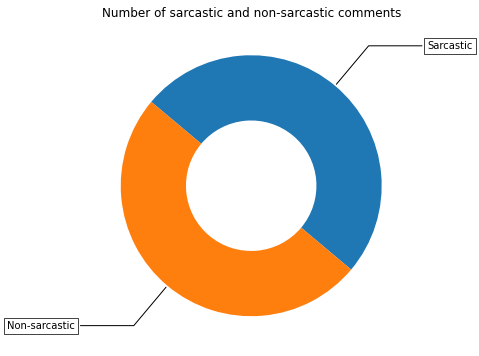

In [18]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = df['label'].value_counts()
print("Number of sarcastic comments ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of non-sarcastic comments ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Sarcastic", "Non-sarcastic"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of sarcastic and non-sarcastic comments")

plt.show()

### Observation:
    This is a balanced dataset.

## Univariate analysis

### 1.Author

In [91]:
df['author'].unique()

array(['Trumpbart', 'Shbshb906', 'Creepeth', ..., 'niels_olson',
       'rebelcommander', 'lastnotice'], dtype=object)

In [92]:
print('Total number of unique authors: ', len(df['author'].unique()))

Total number of unique authors:  256560


                author  Sarcastic_comment  total       Avg
14907      Biffingston                422    845  0.499408
218696  pokemon_fetish                216    432  0.500000
85051      NeonDisease                211    422  0.500000
109459     ShyBiDude89                202    404  0.500000
188432        ivsciguy                171    342  0.500000
                author  Sarcastic_comment  total       Avg
35032   DownvoteDaemon                100    200  0.500000
196805      kurisu7885                100    200  0.500000
64017   JumpingJazzJam                 98    198  0.494949
121320   TheBigBadDuke                 93    186  0.500000
37213     EMINEM_4Evah                 92    184  0.500000


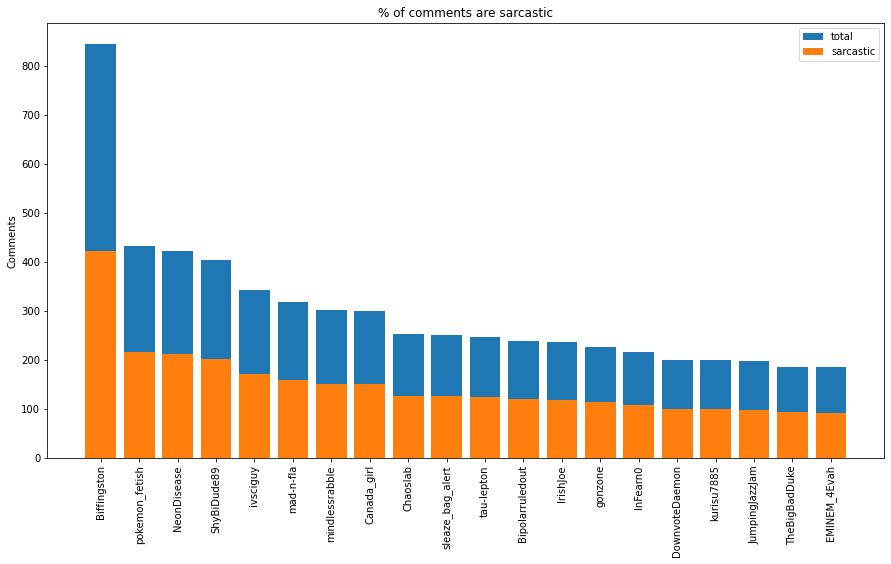

In [145]:
# Group by author and taking sum of ones
temp = pd.DataFrame(df.groupby('author')['label'].agg(lambda x: x.eq(1).sum())).reset_index()

# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
# Group by author and taking counts
temp['total'] = pd.DataFrame(df.groupby('author')['label'].agg(total='count')).reset_index()['total']
# Group by author and taking mean
temp['Avg'] = pd.DataFrame(df.groupby('author')['label'].agg(Avg='mean')).reset_index()['Avg']

# sorting by total counts
temp.sort_values(by=['total'],inplace=True, ascending=False)
temp = temp.rename(columns={'label':'Sarcastic_comment'})

# selecting top 20 authors
temp = temp[:20]
    
ind = np.arange(temp.shape[0])

print(temp.head(5))
print("="*50)
print(temp.tail(5))
    
plt.figure(figsize=(15,8))
p1 = plt.bar(ind, temp['total'].values)
p2 = plt.bar(ind, temp['Sarcastic_comment'].values)

plt.ylabel('Comments')
plt.title('% of comments are sarcastic')
plt.xticks(ind, list(temp['author'].values), rotation=90)
plt.legend((p1[0], p2[0]), ('total', 'sarcastic'))
plt.show()

#### Observation:
    Equal no of sarcastic and non-sarcastic comments for each author.

### 2. Subreddit

In [95]:
print(df['subreddit'].unique())
print('Total number of unique authors: ', len(df['subreddit'].unique()))

['politics' 'nba' 'nfl' ... 'PigJargon' 'Learnmusic' 'Pandemic']
Total number of unique authors:  14876


             subreddit  Sarcastic_comment  total       Avg
587          AskReddit              26363  65672  0.401434
12603         politics              23906  39492  0.605338
14724        worldnews              16947  26376  0.642516
11281  leagueoflegends              11407  21034  0.542312
12403     pcmasterrace              10758  18986  0.566628
10254            funny               8099  17939  0.451474
12040             news              10191  16889  0.603411
12491             pics               7823  16152  0.484336
14089    todayilearned               7753  14159  0.547567
12055              nfl               7213  14148  0.509825
             subreddit  Sarcastic_comment  total       Avg
11979              nba               7448  14146  0.526509
2986   GlobalOffensive               7584  13738  0.552045
257      AdviceAnimals               7560  13481  0.560789
14459           videos               6079  12320  0.493425
10324           gaming               5818  11906  0.4886

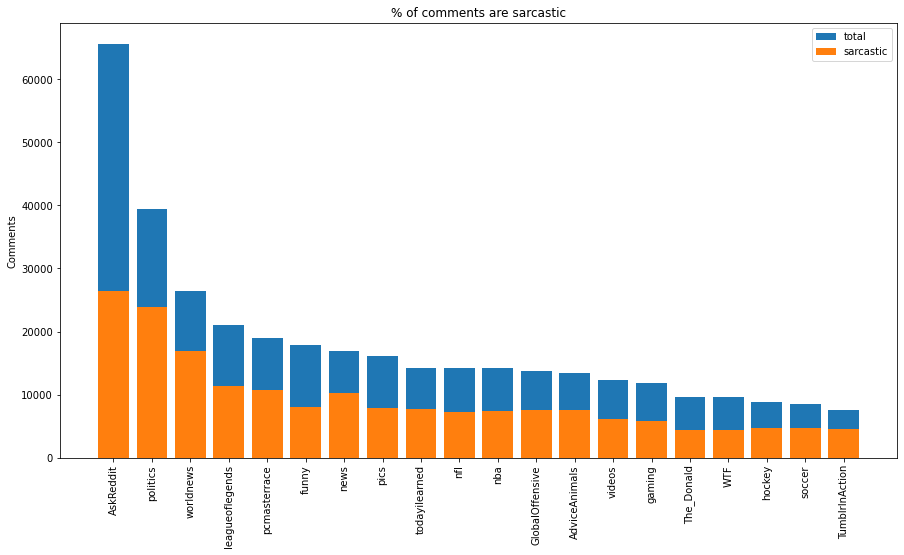

In [150]:
# Group by author and taking sum of ones
temp = pd.DataFrame(df.groupby('subreddit')['label'].agg(lambda x: x.eq(1).sum())).reset_index()

# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
# Group by author and taking counts
temp['total'] = pd.DataFrame(df.groupby('subreddit')['label'].agg(total='count')).reset_index()['total']
# Group by author and taking mean
temp['Avg'] = pd.DataFrame(df.groupby('subreddit')['label'].agg(Avg='mean')).reset_index()['Avg']
    
# sorting by total counts
temp.sort_values(by=['total'],inplace=True, ascending=False)
temp = temp.rename(columns={'label':'Sarcastic_comment'})

# selecting top 20 subreddits
temp = temp[:20]
    
ind = np.arange(temp.shape[0])

print(temp.head(10))
print("="*50)
print(temp.tail(10))
    
plt.figure(figsize=(15,8))
p1 = plt.bar(ind, temp['total'].values)
p2 = plt.bar(ind, temp['Sarcastic_comment'].values)

plt.ylabel('Comments')
plt.title('% of comments are sarcastic')
plt.xticks(ind, list(temp['subreddit'].values), rotation=90)
plt.legend((p1[0], p2[0]), ('total', 'sarcastic'))
plt.show()

### Observations:
    Politics, worldnews, news subreddits publishes more sarcastic comments than non-sarcastic comments and
    TumblrInAction publishes more non-sarcastic comments than sarcastic comments.

### 3.Score

In [97]:
print('min and max scores are: {} and {}'.format(min(df['score']), max(df['score'])))

min and max scores are: -507 and 9070


In [119]:
# selecting score when sarcastic comments
sarcastic_score = df[df['label']==1]['score'].values
# selecting score when sarcastic comments
non_sarcastic_score = df[df['label']==0]['score'].values

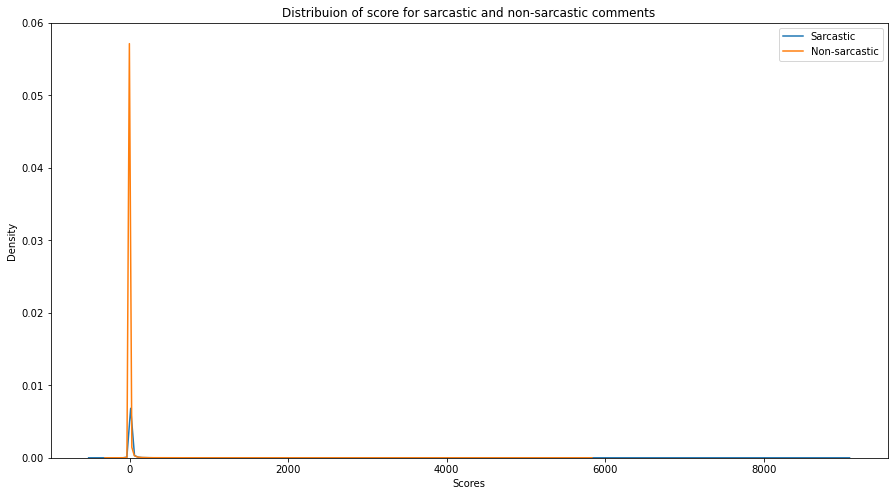

In [125]:
# PDF of score when sarcatic and non-sarcatic comments
plt.figure(figsize=(15,8))
sns.distplot(sarcastic_score, hist=False, label='Sarcastic')
sns.distplot(non_sarcastic_score, hist=False, label='Non-sarcastic')
plt.title('Distribuion of score for sarcastic and non-sarcastic comments')
plt.xlabel('Scores')
plt.legend()
plt.show()

#### Observations:
    When score is low then probability of sarcastic comment is les than non-sarcastic comment.

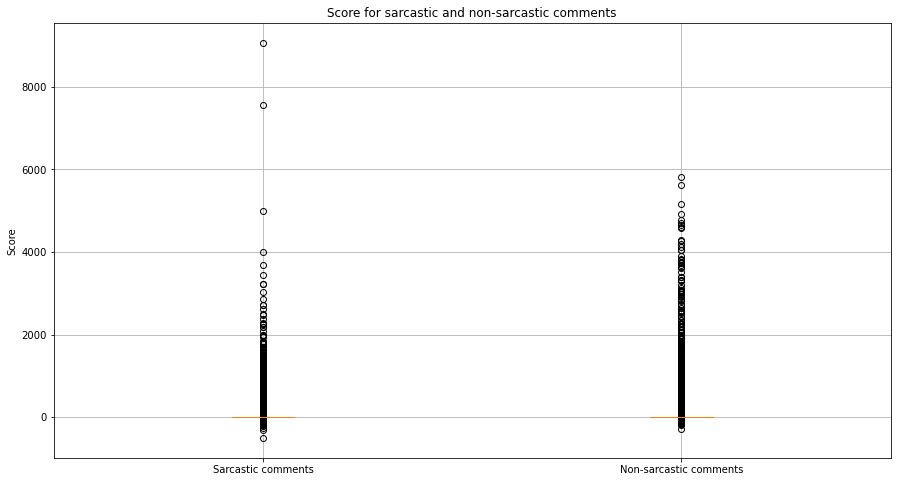

In [121]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
# Boxplot of score when sarcatic and non-sarcatic comments
plt.figure(figsize=(15,8))
plt.boxplot([sarcastic_score, non_sarcastic_score])
plt.title('Score for sarcastic and non-sarcastic comments')
plt.xticks([1,2],('Sarcastic comments','Non-sarcastic comments'))
plt.ylabel('Score')
plt.grid()
plt.show()

#### Observations:
    A few scores are very high, more than 6000 in sarcastic comments.

### 4. ups

In [115]:
print('min and max ups are: {} and {}'.format(min(df['ups']), max(df['ups'])))

min and max ups are: -507 and 5163


In [123]:
# selecting ups when sarcastic comments
sarcastic_ups = df[df['label']==1]['ups'].values 
# selecting ups when non-sarcastic comments
non_sarcastic_ups = df[df['label']==0]['ups'].values

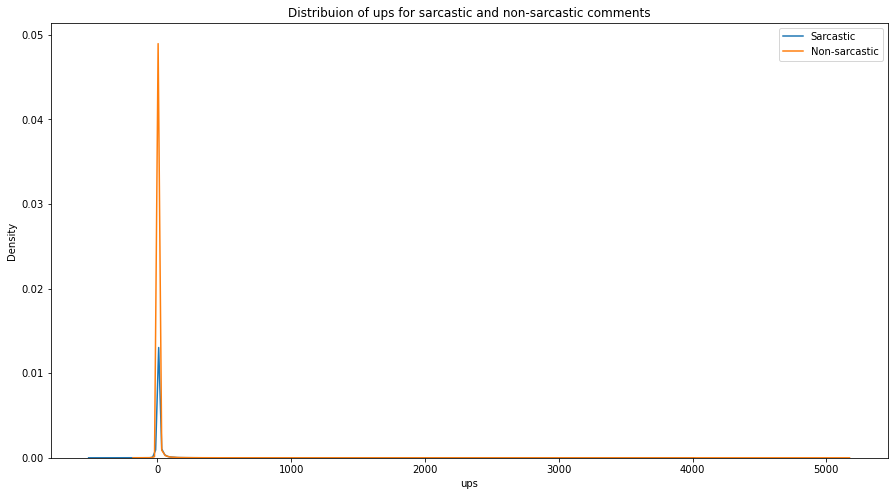

In [126]:
# PDF of ups when sarcatic and non-sarcatic comments
plt.figure(figsize=(15,8))
sns.distplot(sarcastic_ups, hist=False, label='Sarcastic')
sns.distplot(non_sarcastic_ups, hist=False, label='Non-sarcastic')
plt.title('Distribuion of ups for sarcastic and non-sarcastic comments')
plt.xlabel('ups')
plt.legend()
plt.show()

### Observation:
    When ups is low then probability of sarcastic comment is les than non-sarcastic comment.

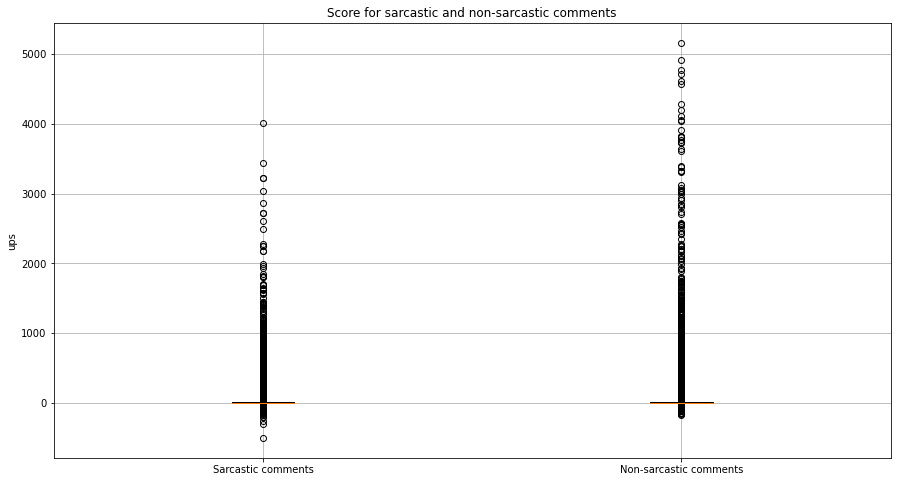

In [127]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
# Boxplot of ups when sarcatic and non-sarcatic comments
plt.figure(figsize=(15,8))
plt.boxplot([sarcastic_ups, non_sarcastic_ups])
plt.title('Score for sarcastic and non-sarcastic comments')
plt.xticks([1,2],('Sarcastic comments','Non-sarcastic comments'))
plt.ylabel('ups')
plt.grid()
plt.show()

### Observation:
    More no of non-sarcastic comments when ups value is very high than sarcastic comments

### 5. Downs

In [129]:
print('min and max downs are: {} and {}'.format(min(df['downs']), max(df['downs'])))

min and max downs are: -1 and 0


   downs  Sarcastic_comment   total       Avg
1      0             441889  863308  0.511856
0     -1              63451  147437  0.430360


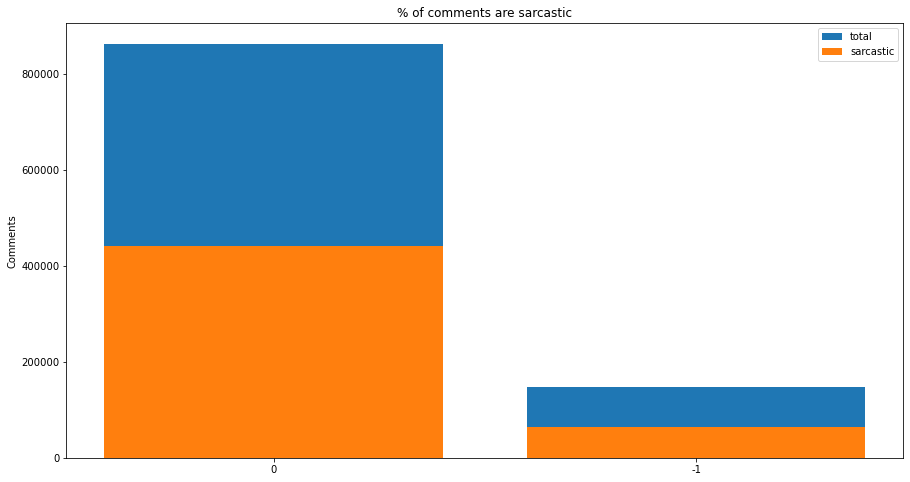

In [139]:
# Group by downs and taking sum of ones
temp = pd.DataFrame(df.groupby('downs')['label'].agg(lambda x: x.eq(1).sum())).reset_index()

# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
# Group by downs and taking counts
temp['total'] = pd.DataFrame(df.groupby('downs')['label'].agg(total='count')).reset_index()['total']
# Group by downs and taking mean
temp['Avg'] = pd.DataFrame(df.groupby('downs')['label'].agg(Avg='mean')).reset_index()['Avg']
    
# Sort by total count
temp.sort_values(by=['total'],inplace=True, ascending=False)
temp = temp.rename(columns={'label':'Sarcastic_comment'})
    
ind = np.arange(temp.shape[0])

print(temp.head())
    
plt.figure(figsize=(15,8))
p1 = plt.bar(ind, temp['total'].values)
p2 = plt.bar(ind, temp['Sarcastic_comment'].values)

plt.ylabel('Comments')
plt.title('% of comments are sarcastic')
plt.xticks(ind, list(temp['downs'].values))
plt.legend((p1[0], p2[0]), ('total', 'sarcastic'))
plt.show()

### Observation:
    When downs value is 0 around 51% of comments are sarcastic but when downs value is -1 around 43% of comments are 
    sarcastic.

### 6. Date

Text(0, 0.5, 'Counts')

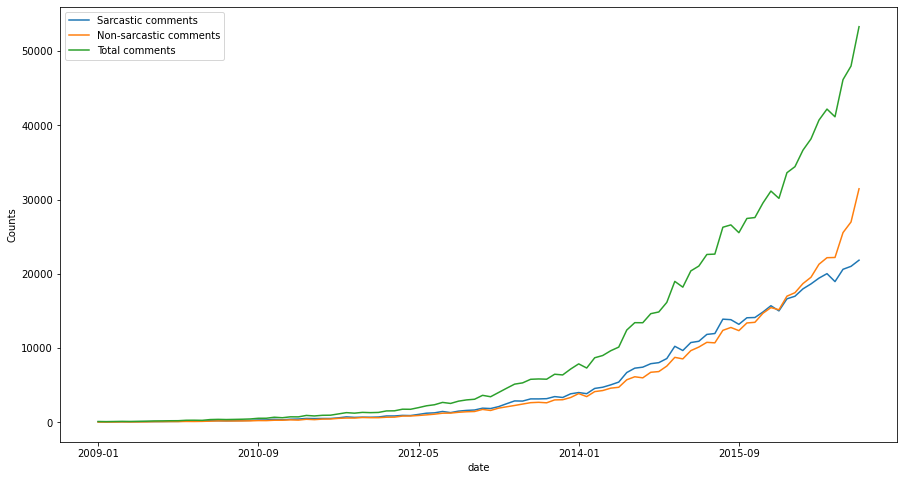

In [45]:
# selecting on sarcastic comments
df_sar = df[df['label']==1]
# selecting on non-sarcastic comments
df_nsar = df[df['label']==0]

# group by date and count no of sarcatic comments
df1 = df_sar.groupby('date')['label'].count()
# group by date and count no of non-sarcatic comments
df2 = df_nsar.groupby('date')['label'].count()
# group by date and count no of total comments
df3 = df.groupby('date')['label'].count()

plt.figure(figsize=(15,8))
df1.plot(label='Sarcastic comments')
df2.plot(label='Non-sarcastic comments')
df3.plot(label='Total comments')
plt.legend()
plt.ylabel('Counts')

### Observation:
 - By date no of comments increases.
 - Between date 2012-05 to 2015-10, no of sarcartic comments are higher than non-sarcastic comments 
but after that  no of non-sarcartic comments are higher than sarcastic comments

### 7. Comment

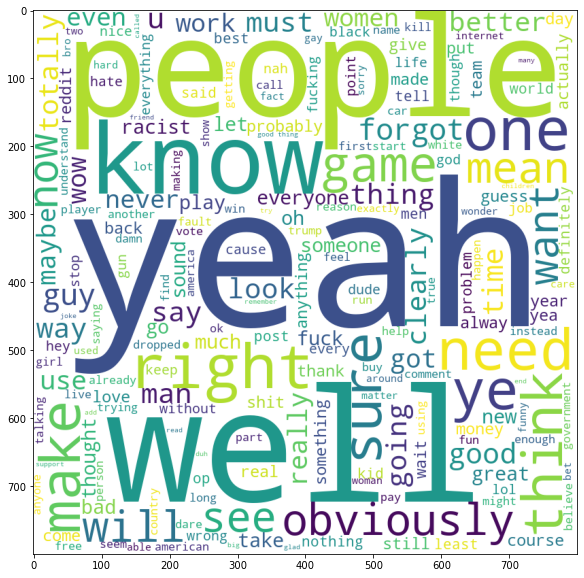

In [4]:
# Sarcastic comment
# this code is taken from: https://www.geeksforgeeks.org/generating-word-cloud-python/#:~:text=comment_words%20%3D%20%27%27,plt.show()
sar_comment = df['comment'][df['label']==1]
comment_words = ''
stopwords = set(STOPWORDS)
 
# for each comment
for val in sar_comment:
     
    # each val of a comment to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

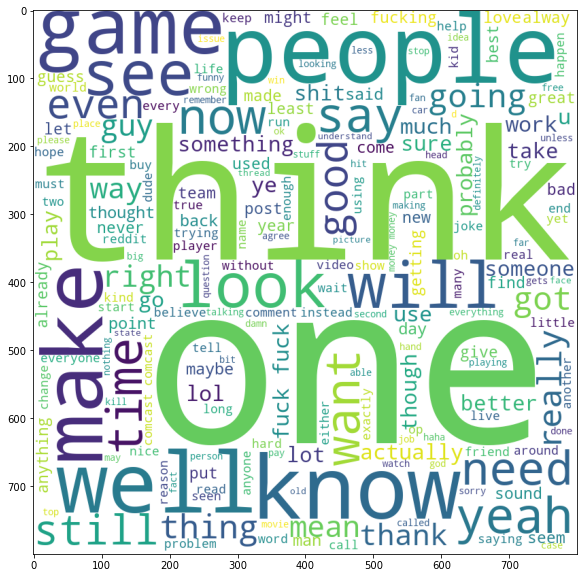

In [6]:
# Non-sarcastic comment
# this code is taken from: https://www.geeksforgeeks.org/generating-word-cloud-python/#:~:text=comment_words%20%3D%20%27%27,plt.show()
nsar_comment = df['comment'][df['label']==0]
comment_words = ''
stopwords = set(STOPWORDS)
 
# for each comment
for val in nsar_comment:
     
    # each val of a comment to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

### Observation:
 - Top sarcastic words in comments are yeah, people, well, know etc.
 - Top non-sarcastic words in comments are think, one, people, make etc.

#### Word counts in comment

In [28]:
# length of each comment and storing in separate column
df['comment_word_count'] = df['comment'].str.split().apply(len)

In [29]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,comment_word_count
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",3
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,14
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,19
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,12
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,7


In [30]:
# sarcastic and non-sarcastic word counts

sar_word_counts = df['comment_word_count'][df['label']==1]
nsar_word_counts = df['comment_word_count'][df['label']==0]

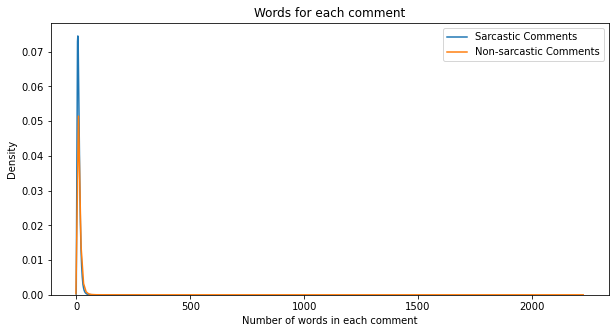

In [31]:
# pdf of word counts

plt.figure(figsize=(10,5))
sns.distplot(sar_word_counts, hist=False, label="Sarcastic Comments")
sns.distplot(nsar_word_counts, hist=False, label="Non-sarcastic Comments")
plt.title('Words for each comment')
plt.xlabel('Number of words in each comment')
plt.legend()
plt.show()

#### Observation:
    Most sarcastic comments are made with short length sentence.

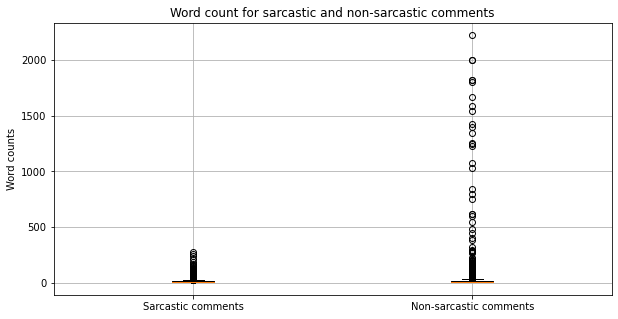

In [37]:
# pdf of word counts vs sarcastic and non-sarcastic comment
plt.figure(figsize=(10,5))
plt.boxplot([sar_word_counts, nsar_word_counts])
plt.title('Word count for sarcastic and non-sarcastic comments')
plt.xticks([1,2],('Sarcastic comments','Non-sarcastic comments'))
plt.ylabel('Word counts')
plt.grid()
plt.show()

#### Observation:
 - Most sarcastic comments are made with short length sentence.
 - When comment length is more than 400 then it's non-sarcastic comment.

### 8. Parent comment

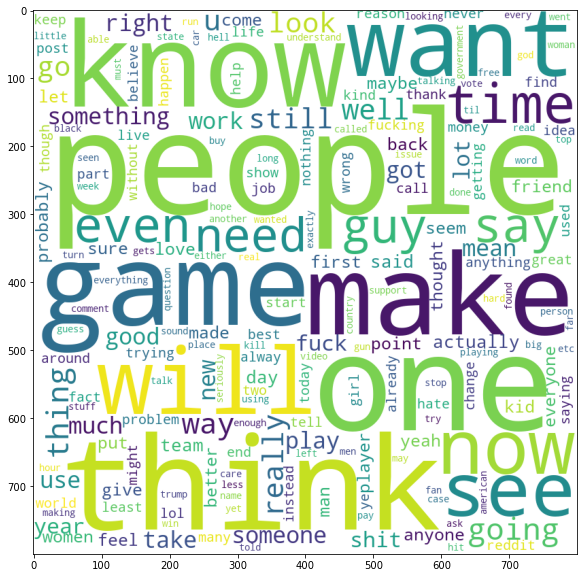

In [38]:
# Sarcastic parent comment
# this code is taken from: https://www.geeksforgeeks.org/generating-word-cloud-python/#:~:text=comment_words%20%3D%20%27%27,plt.show()
sar_comment = df['parent_comment'][df['label']==1]
comment_words = ''
stopwords = set(STOPWORDS)
 
# for each comment
for val in sar_comment:
     
    # each val of a comment to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

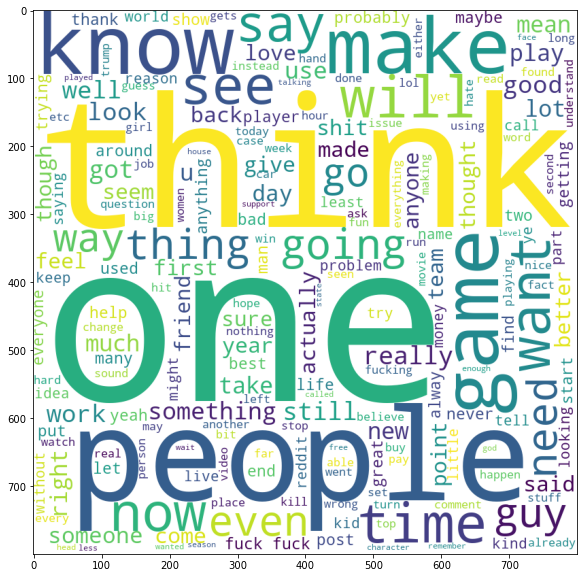

In [39]:
# Non-sarcastic parent comment
# this code is taken from: https://www.geeksforgeeks.org/generating-word-cloud-python/#:~:text=comment_words%20%3D%20%27%27,plt.show()
nsar_comment = df['parent_comment'][df['label']==0]
comment_words = ''
stopwords = set(STOPWORDS)
 
# for each comment
for val in nsar_comment:
     
    # each val of a comment to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

#### Observation:
 - Top sarcastic words in parent comments are people, well, know, make, game, think etc.
 - Top non-sarcastic words in parent comments are think, one, people etc.

#### Word count in parent comment

In [40]:
# length of each parent comment and storing in separate column
df['parent_comment_word_count'] = df['parent_comment'].str.split().apply(len)

In [41]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,comment_word_count,parent_comment_word_count
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",3,17
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,14,27
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,19,4
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,12,5
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,7,18


In [42]:
# sarcastic and non-sarcastic word counts

sar_word_counts_p = df['parent_comment_word_count'][df['label']==1]
nsar_word_counts_p = df['parent_comment_word_count'][df['label']==0]

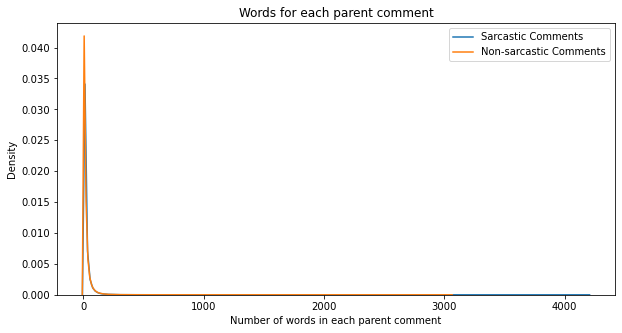

In [43]:
# pdf of word counts

plt.figure(figsize=(10,5))
sns.distplot(sar_word_counts_p, hist=False, label="Sarcastic Comments")
sns.distplot(nsar_word_counts_p, hist=False, label="Non-sarcastic Comments")
plt.title('Words for each parent comment')
plt.xlabel('Number of words in each parent comment')
plt.legend()
plt.show()

#### Observation:
    No of short length non-sarcastic parent comments is more than sarcastic comments.

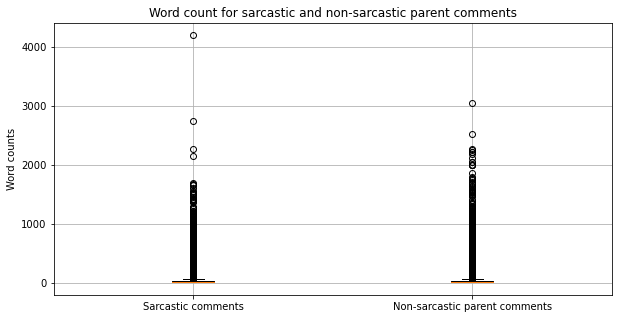

In [44]:
# boxplot of word counts vs sarcastic and non-sarcastic parent comment
plt.figure(figsize=(10,5))
plt.boxplot([sar_word_counts_p, nsar_word_counts_p])
plt.title('Word count for sarcastic and non-sarcastic parent comments')
plt.xticks([1,2],('Sarcastic comments','Non-sarcastic parent comments'))
plt.ylabel('Word counts')
plt.grid()
plt.show()

#### Observation:
    One long length sarcastic parent comment is made otherwise most long length parent comment are non-sarcastic.